In [2]:
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

# disable warnings to tidy up output
import warnings
warnings.filterwarnings("ignore")

# some basic libraries 
#import pandas as pd
#import seaborn as sns
import numpy as np
import glob
import noisereduce as nr
# plot support
import matplotlib.pyplot as plt
import soundfile as sf
import os
from google.cloud import storage
from scipy import signal
# reading audio datasets
import librosa
import librosa.display
import IPython


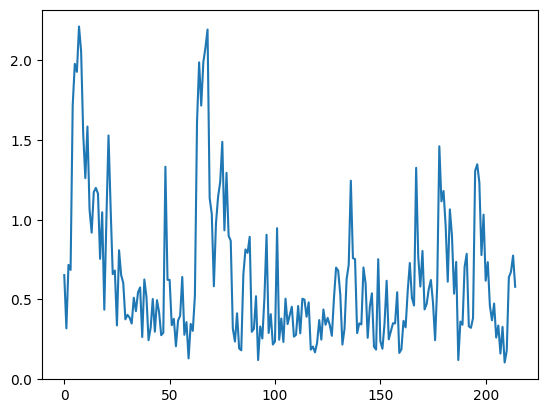

In [42]:
path = r"C:\Users\Tony\Documents\PEData\3_Dataset_PE_4\Aegotheles Cristatus\00003-0.wav"

y, sr = librosa.load(path)

F, f_names = ShortTermFeatures.feature_extraction(y, sr, 512, 512)

plt.plot(F[5])

In [43]:
IPython.display.Audio(data=y, rate=sr)

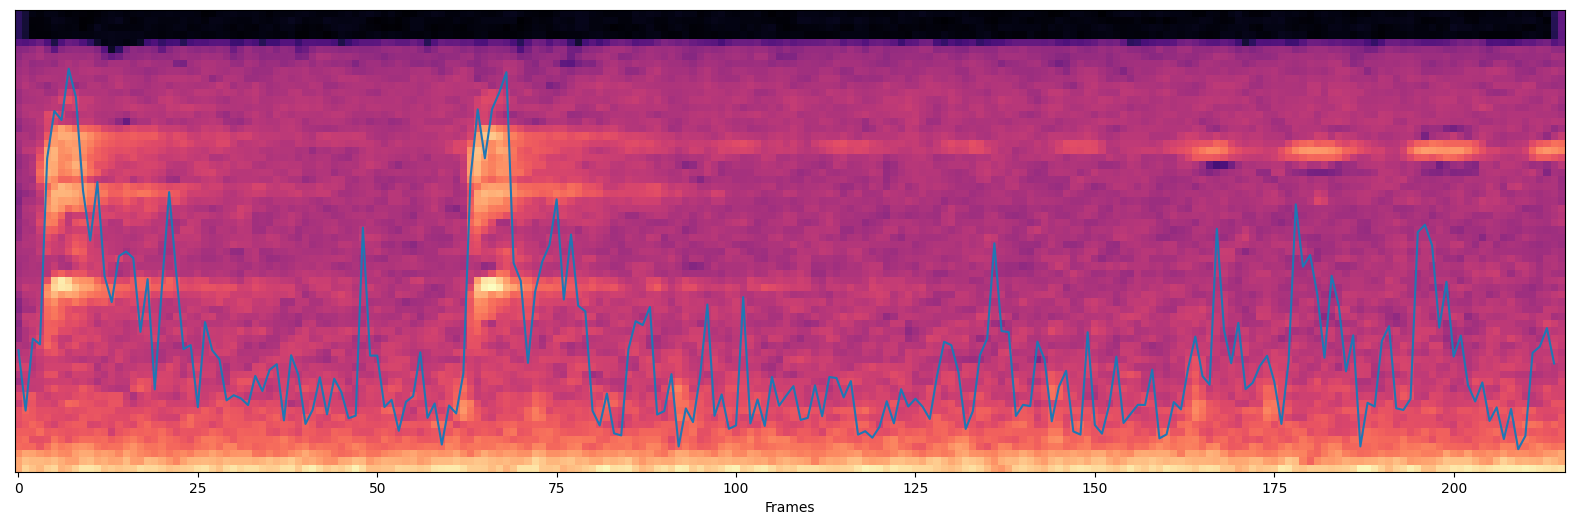

In [44]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
S1 = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, n_fft=2048, hop_length=512)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, ax = ax,  x_axis='frames')
ax.plot(F[5]*25)

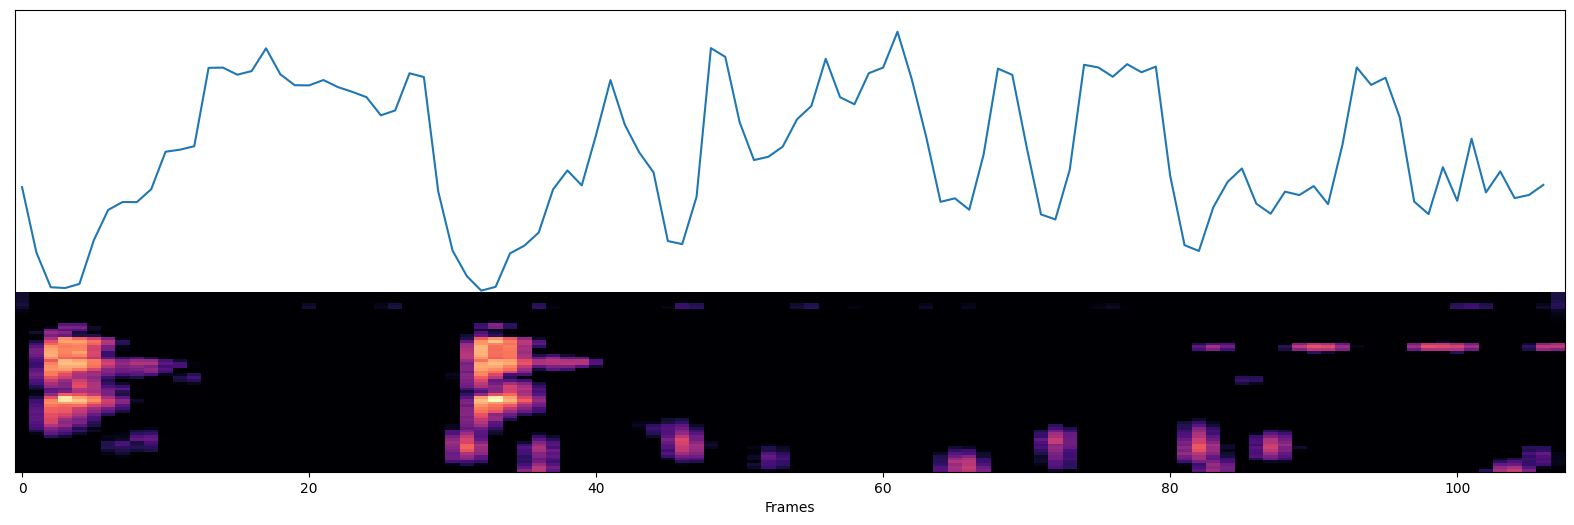

In [48]:
reduced_noise = nr.reduce_noise(y = y, sr=sr, n_std_thresh_stationary=2.0,stationary=True)
F, f_names = ShortTermFeatures.feature_extraction(reduced_noise, sr, 1024, 1024)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
S1 = librosa.feature.melspectrogram(y=reduced_noise, sr=sr, n_mels=64, n_fft=2048, hop_length=1024)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, ax = ax,  x_axis='frames')
ax.plot(F[8]*64/F[8].max())

In [23]:
IPython.display.Audio(data=reduced_noise, rate=sr)